In [1]:
import os
from google.colab import drive

drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/Colab Notebooks/spectrogram_approach')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Spectrograms Approach

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import librosa.display, os
import pandas as pd

def create_spectrogram(audio_file, image_file):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)

    y, sr = librosa.load(audio_file)
    ms = librosa.feature.melspectrogram(y=y, sr=sr)
    log_ms = librosa.power_to_db(ms, ref=np.max)
    librosa.display.specshow(log_ms, sr=sr)

    fig.savefig(image_file)
    plt.close(fig)
    
def create_pngs_from_wavs(input_path, output_path):
    if not os.path.exists(output_path):
        os.makedirs(output_path)

    dir = os.listdir(input_path)

    for i, file in enumerate(dir):
        input_file = os.path.join(input_path, file)
        output_file = os.path.join(output_path, file.replace('.wav', '.png'))
        create_spectrogram(input_file, output_file)

In [3]:
source_df = pd.read_csv('./Training_Dataset/training_datalist.csv')

In [4]:
source_df

,ID,Sex,Age,Disease category,Narrow pitch range,Decreased volume,Fatigue,Dryness,Lumping,heartburn,...,Onset of dysphonia,Noise at work,Occupational vocal demand,Diabetes,Hypertension,CAD,Head and Neck Cancer,Head injury,CVA,Voice handicap index - 10
0,1202f15,2,39,1,1,1,1,1,1,0,...,2,3,1,0,0,0,0,0,0,22.0
1,0600ve0,1,69,2,1,1,1,1,0,0,...,2,1,3,0,0,0,0,0,1,19.0
2,1001o7l,2,59,2,1,1,1,1,0,0,...,2,3,4,0,0,0,0,0,0,18.0
3,1201c1t,2,47,1,1,0,1,1,1,0,...,3,1,1,0,0,0,0,0,0,27.0
4,0402jvt,1,87,1,0,0,0,0,0,0,...,1,1,4,0,1,0,0,0,0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0G00ftn,1,75,3,0,0,0,0,0,0,...,1,1,4,1,1,1,0,0,0,21.0
996,1201pkr,1,40,4,0,0,1,0,0,0,...,2,1,2,0,0,0,0,0,0,21.0
997,0202p64,2,68,3,0,1,1,0,0,0,...,5,2,1,0,0,0,0,0,0,27.0
998,12021au,2,42,2,0,0,1,1,1,0,...,4,1,2,0,0,0,0,0,0,12.0


In [5]:
dic = {'1':0, '2':0, '3':0, '4':0, '5':0}

dic['5'] = len(source_df[source_df["Disease category"] == 5])

dic['4'] = len(source_df[source_df["Disease category"] == 4])

dic['3'] = len(source_df[source_df["Disease category"] == 3])

dic['2'] = len(source_df[source_df["Disease category"] == 2])

dic['1'] = len(source_df[source_df["Disease category"] == 1])

dic

{'1': 536, '2': 220, '3': 168, '4': 44, '5': 32}

In [6]:
# #產生spectrograms
# create_pngs_from_wavs('./Training_Dataset/1000training_voice_data', 'C:/Users/chouy/Desktop/aicup_trial/Training_Dataset/Spectrograms')

In [7]:
import keras.utils as image


def load_images_from_path(path):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        label = source_df[source_df['ID']==file[:-4]]['Disease category']-1
#         print(file[:-4], label)
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

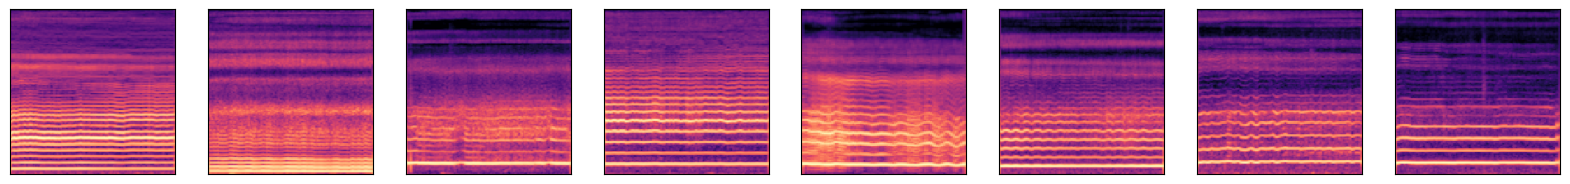

In [8]:
images, labels = load_images_from_path('./Training_Dataset/Spectrograms')
show_images(images)
    
x += images
y += labels

In [9]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

x_train_norm = np.array(x_train) / 255
x_test_norm = np.array(x_test) / 255

#y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [10]:
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D
# from keras.layers import Flatten, Dense

# model = Sequential()
# model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(MaxPooling2D(2, 2))
# model.add(Flatten())
# model.add(Dense(1024, activation='relu'))
# model.add(Dense(5, activation='softmax'))
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [11]:
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
# MODEL_SAVE_NAME = "spec_model"

# hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=10, epochs=10, callbacks=[EarlyStopping(monitor='val_loss', patience=5, mode='auto'),
#                                         ModelCheckpoint(MODEL_SAVE_NAME+".h5", save_best_only=True)])

In [12]:
# acc = hist.history['accuracy']
# val_acc = hist.history['val_accuracy']
# epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, '-', label='Training Accuracy')
# plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(loc='lower right')
# plt.plot()

# SMOTE

In [13]:
from imblearn.over_sampling import SMOTE

x_train_re = np.array(x_train).reshape(len(x_train),-1)

model_smote = SMOTE()
x_smote_resampled, y_smote_resampled = model_smote.fit_resample(x_train_re,y_train)

x_smote_resampled = x_smote_resampled.reshape(-1,224,224,3)
y_train_encoded = to_categorical(y_smote_resampled)

In [14]:
x_smote_resampled.shape

(1875, 224, 224, 3)

# Transfer Learning

In [15]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#x_train_norm = preprocess_input(np.array(x_train))
x_train_norm = preprocess_input(x_smote_resampled)
x_test_norm = preprocess_input(np.array(x_test))

train_features = base_model.predict(x_train_norm)
test_features = base_model.predict(x_test_norm)

10/10 [==============================] - 13s 1s/step


In [16]:
x_train_norm.shape

(1875, 224, 224, 3)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=train_features.shape[1:]))
model.add(Dense(1024, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

MODEL_SAVE_NAME = "pretrain_model"
hist = model.fit(train_features, y_train_encoded, validation_data=(test_features, y_test_encoded), batch_size=10, epochs=10,callbacks=[EarlyStopping(monitor='val_loss', patience=5, mode='auto'),
                                        ModelCheckpoint(MODEL_SAVE_NAME+".h5", save_best_only=True)])

Epoch 1/10
188/188 [==============================] - 229s 1s/step - loss: 10.7460 - accuracy: 0.6448 - val_loss: 6.2538 - val_accuracy: 0.5100
Epoch 2/10
188/188 [==============================] - 243s 1s/step - loss: 0.6109 - accuracy: 0.8901 - val_loss: 4.5788 - val_accuracy: 0.4400
Epoch 3/10
188/188 [==============================] - 222s 1s/step - loss: 0.4177 - accuracy: 0.9131 - val_loss: 6.1539 - val_accuracy: 0.5400
Epoch 4/10
188/188 [==============================] - 232s 1s/step - loss: 0.2748 - accuracy: 0.9419 - val_loss: 3.9360 - val_accuracy: 0.5600
Epoch 5/10
188/188 [==============================] - 224s 1s/step - loss: 0.1329 - accuracy: 0.9664 - val_loss: 4.6377 - val_accuracy: 0.5700
Epoch 6/10
188/188 [==============================] - 217s 1s/step - loss: 0.1648 - accuracy: 0.9595 - val_loss: 4.1995 - val_accuracy: 0.5333
Epoch 7/10
188/188 [==============================] - 227s 1s/step - loss: 0.0332 - accuracy: 0.9851 - val_loss: 4.2758 - val_accuracy: 0.550

[]

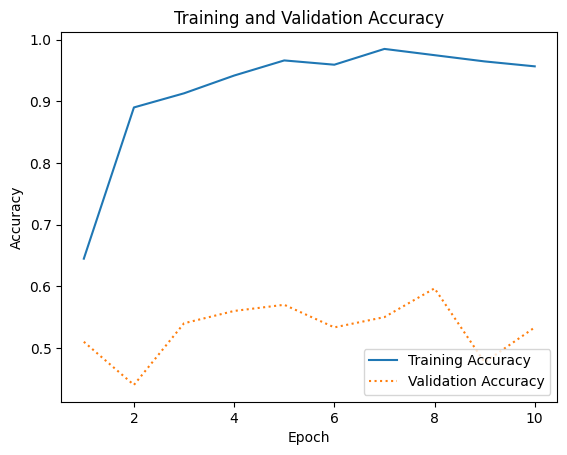

In [19]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

10/10 [==============================] - 1s 126ms/step


Text(109.44999999999997, 0.5, 'Actual label')

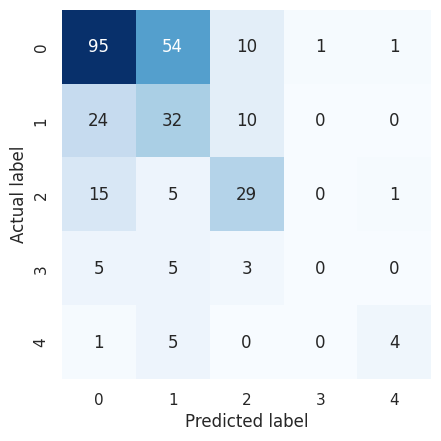

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

y_predicted = model.predict(test_features)
mat = confusion_matrix(y_test_encoded.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['0', '1', '2', '3', '4']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [21]:
true_positives = np.diag(mat)
positives = np.sum(mat, axis=1)
uar = np.mean(true_positives / positives)

In [22]:
print("UAR:", uar)

UAR: 0.4109821193299454


# Predict (Public Dataset)

In [23]:
# audio_path = './Public Testing Dataset/test_data_public'
# save_path = './Public Testing Dataset/Spectrograms'
# create_pngs_from_wavs(audio_path, save_path)

In [24]:
ans_df = pd.read_csv('./Public Testing Dataset/public有答案.csv')

In [25]:
dic = {'1':0, '2':0, '3':0, '4':0, '5':0}

dic['5'] = len(ans_df[ans_df["Disease category"] == 5])

dic['4'] = len(ans_df[ans_df["Disease category"] == 4])

dic['3'] = len(ans_df[ans_df["Disease category"] == 3])

dic['2'] = len(ans_df[ans_df["Disease category"] == 2])

dic['1'] = len(ans_df[ans_df["Disease category"] == 1])

dic

{'1': 268, '2': 110, '3': 84, '4': 22, '5': 16}

In [26]:
def load_images_from_path(path):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        label = ans_df[ans_df['ID']==file[:-4]]['Disease category']-1
#         print(file[:-4], label)
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

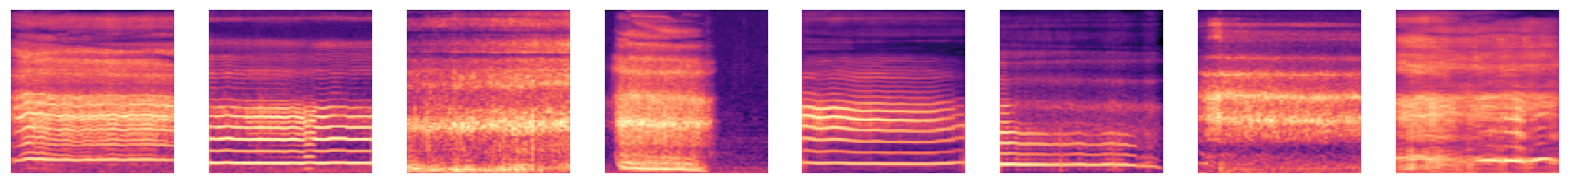

In [27]:
images, labels = load_images_from_path('./Public Testing Dataset/Spectrograms')

show_images(images)
    
x += images
y += labels

In [28]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [29]:
# x = np.array(x)
# y = np.array(y)


In [30]:
x= preprocess_input(np.array(x))
y = to_categorical(y)
y = np.array(y)
# print(x.shape)
# print(y.shape)

In [31]:
features = base_model.predict(x)
# predictions = model.predict(x)


16/16 [==============================] - 21s 1s/step


In [32]:
# model = load_model("spec_model.h5")
model = load_model("pretrain_model.h5")

16/16 [==============================] - 4s 220ms/step


Text(109.44999999999997, 0.5, 'Actual label')

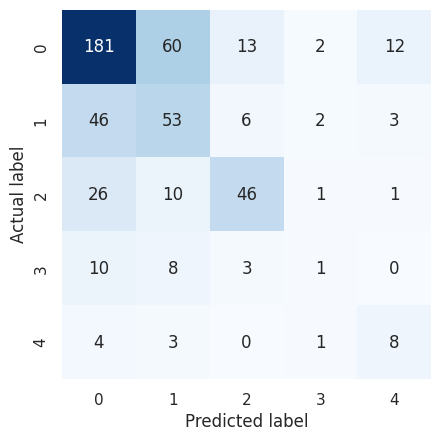

In [33]:
sns.set()

y_predicted = model.predict(features)
mat = confusion_matrix(y.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['0', '1', '2', '3', '4']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [34]:
true_positives = np.diag(mat)
positives = np.sum(mat, axis=1)
uar = np.mean(true_positives / positives)

In [35]:
print("UAR:", uar)

UAR: 0.4500529818440267


# Predict (Private Dataset)

In [36]:
# audio_path = 'C:/Users/chouy/Desktop/aicup_trial/Private Testing Dataset/test_data_private'
# save_path = 'C:/Users/chouy/Desktop/aicup_trial/Private Testing Dataset/Spectrograms'
# create_pngs_from_wavs(audio_path, save_path)

In [37]:
ans_df = pd.read_csv('./Private Testing Dataset/private有答案.csv') 

In [38]:
dic = {'1':0, '2':0, '3':0, '4':0, '5':0}

dic['5'] = len(ans_df[ans_df["Disease category"] == 5])

dic['4'] = len(ans_df[ans_df["Disease category"] == 4])

dic['3'] = len(ans_df[ans_df["Disease category"] == 3])

dic['2'] = len(ans_df[ans_df["Disease category"] == 2])

dic['1'] = len(ans_df[ans_df["Disease category"] == 1])

dic

{'1': 269, '2': 110, '3': 84, '4': 22, '5': 15}

In [39]:
def load_images_from_path(path):
    images = []
    labels = []

    for file in os.listdir(path):
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(224, 224, 3))))
        label = ans_df[ans_df['ID']==file[:-4]]['Disease category']-1
#         print(file[:-4], label)
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 8, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i] / 255)
        
x = []
y = []

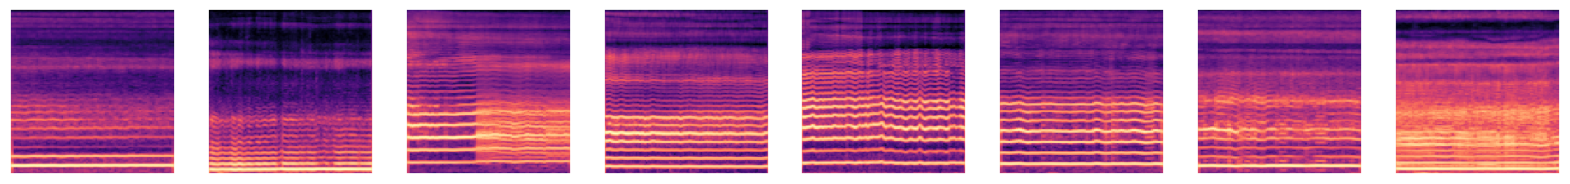

In [40]:
images, labels = load_images_from_path('./Private Testing Dataset/Spectrograms')

show_images(images)
    
x += images
y += labels

In [41]:
# x = np.array(x)
# y = np.array(y)

x= preprocess_input(np.array(x))
y = to_categorical(y)
y = np.array(y)

In [42]:
features = base_model.predict(x)

16/16 [==============================] - 24s 1s/step


In [43]:
model = load_model("pretrain_model.h5")

16/16 [==============================] - 3s 188ms/step


Text(109.44999999999997, 0.5, 'Actual label')

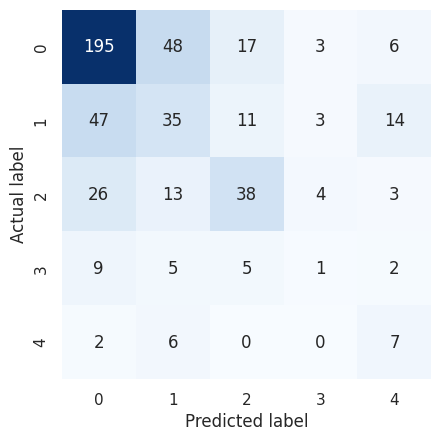

In [44]:
sns.set()

y_predicted = model.predict(features)
mat = confusion_matrix(y.argmax(axis=1), y_predicted.argmax(axis=1))
class_labels = ['0', '1', '2', '3', '4']

sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=class_labels,
            yticklabels=class_labels)

plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [45]:
true_positives = np.diag(mat)
positives = np.sum(mat, axis=1)
uar = np.mean(true_positives / positives)

In [46]:
print("UAR:", uar)

UAR: 0.4015182091762017
